In [1]:
import pandas as pd

In [2]:
bank=pd.read_excel('steel_plant_bank_statement.xlsx')

In [3]:
bank.head()

Date            Description    Type     Amount     Balance
0 2025-03-01      Payment to Vendor   Debit  372067.50  4627932.50
1 2025-03-01          Water Utility   Debit  115489.32  4512443.18
2 2025-03-01             Scrap Sale  Credit   55735.11  4568178.29
3 2025-03-02  Raw Material Purchase   Debit  297293.79  4270884.50
4 2025-03-02      Payment to Vendor   Debit   19749.62  4251134.88

In [4]:
ap_ar_data=pd.read_excel('steel_plant_ap_ar_data.xlsx')

In [5]:
ap_ar_data.head()

Date                  Description                 Type     Amount  \
0 2025-03-01        Machinery Spare Parts     Accounts Payable  151995.70   
1 2025-03-01  Maintenance Service Charges     Accounts Payable  166188.37   
2 2025-03-01         Utility Bill Payment     Accounts Payable  170056.05   
3 2025-03-01         Export Sale - Europe  Accounts Receivable  467097.61   
4 2025-03-01            Commission Income  Accounts Receivable  127014.72   

           Status  
0         Pending  
1            Paid  
2  Partially Paid  
3         Pending  
4        Received

In [6]:
master_excel = "steel_plant_master_data.xlsx"

In [7]:
chart_of_accounts_data = pd.read_excel(master_excel, sheet_name="Chart of Accounts")
customers_data = pd.read_excel(master_excel, sheet_name="Customers")
vendors_data = pd.read_excel(master_excel, sheet_name="Vendors")
revenue_centres_data = pd.read_excel(master_excel, sheet_name="Revenue Centres")
cost_centres_data = pd.read_excel(master_excel, sheet_name="Cost Centres")

In [8]:
chart_of_accounts_data.head()

Account Code         Account Name       Type
0          1000                 Cash      Asset
1          1100  Accounts Receivable      Asset
2          1200            Inventory      Asset
3          1300     Prepaid Expenses      Asset
4          2000     Accounts Payable  Liability

In [9]:
customers_data.head()

Customer ID Customer Name Region  Credit Limit
0     CUST000      Client A   East    1997184.30
1     CUST001      Client B   West    1288215.73
2     CUST002      Client C   East    1935028.24
3     CUST003      Client D   West    1868186.24
4     CUST004      Client E   East    1319409.83

In [10]:
vendors_data.head()

Vendor ID Vendor Name      Category Payment Terms
0   VEND000    Vendor A     Transport        Net 60
1   VEND001    Vendor B     Utilities        Net 45
2   VEND002    Vendor C     Utilities        Net 45
3   VEND003    Vendor D   IT Services        Net 45
4   VEND004    Vendor E  Raw Material        Net 60

In [11]:
revenue_centres_data.head()

RevCentre Code    RevCentre Name Region
0           RC00  Revenue Centre 0   West
1           RC01  Revenue Centre 1   East
2           RC02  Revenue Centre 2   West
3           RC03  Revenue Centre 3  South
4           RC04  Revenue Centre 4  South

In [12]:
cost_centres_data.head()

CostCentre Code CostCentre Name   Department
0            CC00   Cost Centre 0  Maintenance
1            CC01   Cost Centre 1  Maintenance
2            CC02   Cost Centre 2        Sales
3            CC03   Cost Centre 3   Production
4            CC04   Cost Centre 4        Sales

In [13]:
transactions_data = pd.read_excel(r"C:\Users\akank\Documents\CASHFLOW\steel_plant_transactions.xlsx")

In [14]:
transactions_data.head()

Transaction No        Date      Reference                      Description  \
0             1.0  2025-06-25           OPEN                  Opening Balance   
1             2.0  2025-06-25  CUST-INV-1001  Customer Payment - Invoice 1001   
2             3.0  2025-06-25   VEN-PAY-2001   Vendor Payment - Raw Materials   
3             4.0  2025-06-25  STAT-GST-3001                      GST Payment   
4             5.0  2025-06-25   EMP-PAY-4001             Payroll Disbursement   

      Type  Amount (INR)  Balance (INR)   
0     OPEN           NaN      10000000.0  
1   INWARD     1500000.0      11500000.0  
2  OUTWARD      700000.0      10800000.0  
3  OUTWARD      250000.0      10550000.0  
4  OUTWARD      900000.0       9650000.0

In [15]:
bank.columns=bank.columns.str.strip()

In [16]:
bank['Date']=pd.to_datetime(bank['Date'],dayfirst='True')

In [17]:
bank['Amount'] = bank['Amount'].astype(float)

In [18]:
transactions_data.columns=transactions_data.columns.str.strip()

In [19]:
transactions_data['Date'] = pd.to_datetime(transactions_data['Date'], dayfirst=True)

C:\Users\akank\AppData\Local\Temp\ipykernel_15348\2144148438.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  transactions_data['Date'] = pd.to_datetime(transactions_data['Date'], dayfirst=True)


In [20]:
transactions_data.rename(columns={'Amount (INR)': 'Amount', 'Balance (INR)': 'Balance'}, inplace=True)

In [21]:
transactions_data['Amount'] = pd.to_numeric(transactions_data['Amount'], errors='coerce')

In [22]:
ap_ar_data.columns = ap_ar_data.columns.str.strip()

In [23]:
ap_ar_data['Date'] = pd.to_datetime(ap_ar_data['Date'], dayfirst=True)

In [24]:
def categorize_transaction(desc):
    desc = desc.lower()
    if any(k in desc for k in [
        'sale', 'customer', 'receipt', 'income', 'commission',
        'vendor', 'raw material', 'utility', 'payable', 'service',
        'electricity', 'water', 'fuel', 'interest', 'advance',
        'spare', 'logistics', 'packaging', 'maintenance',
        'security', 'cleaning', 'calibration', 'office supplies',
        'consultancy', 'training', 'insurance', 'tools',
        'uniforms', 'printing', 'courier', 'canteen',
        'payroll', 'salary', 'wages'
    ]):
        return 'Operating'
    
    elif any(k in desc for k in ['machinery', 'equipment', 'capital']):
        return 'Investing'
    
    elif any(k in desc for k in [
        'loan', 'tds', 'gst', 'dividend', 'equity',
        'pf', 'provident', 'esi', 'lwf', 'royalty'
    ]):
        return 'Financing'
    
    elif 'opening' in desc:
        return 'Opening'
    
    elif 'closing' in desc:
        return 'Closing'
    
    else:
        return 'Uncategorized'

In [25]:
transactions_data['Cash Flow Category'] = transactions_data['Description'].astype(str).apply(categorize_transaction)

In [26]:
transactions_data.head()

Transaction No       Date      Reference                      Description  \
0             1.0 2025-06-25           OPEN                  Opening Balance   
1             2.0 2025-06-25  CUST-INV-1001  Customer Payment - Invoice 1001   
2             3.0 2025-06-25   VEN-PAY-2001   Vendor Payment - Raw Materials   
3             4.0 2025-06-25  STAT-GST-3001                      GST Payment   
4             5.0 2025-06-25   EMP-PAY-4001             Payroll Disbursement   

      Type     Amount     Balance Cash Flow Category  
0     OPEN        NaN  10000000.0            Opening  
1   INWARD  1500000.0  11500000.0          Operating  
2  OUTWARD   700000.0  10800000.0          Operating  
3  OUTWARD   250000.0  10550000.0          Financing  
4  OUTWARD   900000.0   9650000.0          Operating

In [27]:
def inflow(row):
    return row['Amount'] if str(row['Type']).lower() in ['inward', 'credit'] else 0
def outflow(row):
    return row['Amount'] if str(row['Type']).lower() in ['outward', 'debit'] else 0

In [28]:
transactions_data['Cash Inflow'] = transactions_data.apply(inflow, axis=1)
transactions_data['Cash Outflow'] = transactions_data.apply(outflow, axis=1)
transactions_data['Net Flow'] = transactions_data['Cash Inflow'] - transactions_data['Cash Outflow']

In [29]:
transactions_data.head()

Transaction No       Date      Reference                      Description  \
0             1.0 2025-06-25           OPEN                  Opening Balance   
1             2.0 2025-06-25  CUST-INV-1001  Customer Payment - Invoice 1001   
2             3.0 2025-06-25   VEN-PAY-2001   Vendor Payment - Raw Materials   
3             4.0 2025-06-25  STAT-GST-3001                      GST Payment   
4             5.0 2025-06-25   EMP-PAY-4001             Payroll Disbursement   

      Type     Amount     Balance Cash Flow Category  Cash Inflow  \
0     OPEN        NaN  10000000.0            Opening          0.0   
1   INWARD  1500000.0  11500000.0          Operating    1500000.0   
2  OUTWARD   700000.0  10800000.0          Operating          0.0   
3  OUTWARD   250000.0  10550000.0          Financing          0.0   
4  OUTWARD   900000.0   9650000.0          Operating          0.0   

   Cash Outflow   Net Flow  
0           0.0        0.0  
1           0.0  1500000.0  
2      700000.0  -700000.0  
3      250000.0  -250000.0  
4      900000.0  -900000.0

In [30]:
CHART_OF_ACCOUNTS = {
    1000: {'name': 'Cash', 'type': 'Asset'},
    1100: {'name': 'Accounts Receivable', 'type': 'Asset'},
    1200: {'name': 'Inventory', 'type': 'Asset'},
    1300: {'name': 'Prepaid Expenses', 'type': 'Asset'},
    2000: {'name': 'Accounts Payable', 'type': 'Liability'},
    2100: {'name': 'Accrued Expenses', 'type': 'Liability'},
    3000: {'name': 'Revenue', 'type': 'Income'},
    3100: {'name': 'Scrap Sales', 'type': 'Income'},
    4000: {'name': 'Cost of Goods Sold', 'type': 'Expense'},
    4100: {'name': 'Utilities Expense', 'type': 'Expense'},
    4200: {'name': 'Maintenance Expense', 'type': 'Expense'},
    4300: {'name': 'Salaries Expense', 'type': 'Expense'},
}


In [31]:
CASH_ORIGIN_GL_ACCOUNT = {
    'CUSTOMER_SALES': 3000,
    'MATERIAL_SALES': 3100,
    'SUPPLIER_PAYMENT': 2000,
    'MATERIAL_PURCHASE': 4000,
    'UTILITIES': 4100,
    'MAINTENANCE': 4200,
    'PAYROLL': 4300,
    'INTEREST': 2100,
    'FINANCING': 2100,
    'TAX': 2100,
    'GOVT_GRANT': 3000,
    'ROYALTY': 2100,
    'SERVICES': 4200,
    'LOGISTICS': 4200,
    'ADVANCE_RECEIVED': 1100
}


In [32]:
GL_ACCOUNT_MAPPING = {
    'cash': 1000,
    'customer': 1100,
    'advance': 1100,
    'sale': 3000,
    'invoice': 3000,
    'commission': 3000,
    'scrap': 3100,
    'raw material': 4000,
    'fuel': 4000,
    'coal': 4000,
    'electricity': 4100,
    'water': 4100,
    'utility': 4100,
    'maintenance': 4200,
    'repair': 4200,
    'salary': 4300,
    'payroll': 4300,
    'wage': 4300,
    'tds': 2100,
    'gst': 2100,
    'esi': 2100,
    'pf': 2100,
    'equipment': 1200,
    'machinery': 1200,
    'vendor': 2000,
    'loan': 2100,
    'interest': 2100,
    'grant': 3000,
    'royalty': 2100,
    'cleaning': 4200,
    'transport': 4200,
    'consultancy': 4200,
    'canteen': 4200,
    'training': 4200,
    'security': 4200,
    'freight': 4200,
    'insurance': 4200,
    'bank charge': 4200
}


In [33]:
CASH_ORIGIN_MAPPING = {
    'sale': 'CUSTOMER_SALES',
    'invoice': 'CUSTOMER_SALES',
    'customer': 'CUSTOMER_SALES',
    'advance': 'ADVANCE_RECEIVED',
    'vendor': 'SUPPLIER_PAYMENT',
    'raw material': 'MATERIAL_PURCHASE',
    'fuel': 'MATERIAL_PURCHASE',
    'coal': 'MATERIAL_PURCHASE',
    'utility': 'UTILITIES',
    'electricity': 'UTILITIES',
    'water': 'UTILITIES',
    'maintenance': 'MAINTENANCE',
    'repair': 'MAINTENANCE',
    'salary': 'PAYROLL',
    'payroll': 'PAYROLL',
    'wage': 'PAYROLL',
    'interest': 'INTEREST',
    'loan': 'FINANCING',
    'tds': 'TAX',
    'gst': 'TAX',
    'esi': 'TAX',
    'pf': 'TAX',
    'grant': 'GOVT_GRANT',
    'royalty': 'ROYALTY',
    'cleaning': 'SERVICES',
    'transport': 'LOGISTICS',
    'consultancy': 'SERVICES',
    'canteen': 'SERVICES',
    'training': 'SERVICES',
    'security': 'SERVICES',
    'scrap': 'MATERIAL_SALES',
    'commission': 'CUSTOMER_SALES',
    'freight': 'LOGISTICS',
    'insurance': 'SERVICES',
    'bank charge': 'SERVICES'
}


In [34]:
def get_gl_account(description):
    desc = str(description).lower()
    for keyword, account_code in GL_ACCOUNT_MAPPING.items():
        if keyword in desc:
            return account_code
    return None


In [35]:
def get_account_type(gl_account):
    return CHART_OF_ACCOUNTS.get(gl_account, {}).get('type') if gl_account else None

In [36]:
# Create structured mapping output
rows = []
for keyword, gl_account_code in GL_ACCOUNT_MAPPING.items():
    gl_account_name = CHART_OF_ACCOUNTS.get(gl_account_code, {}).get('name', 'Unknown')

    origin_key = CASH_ORIGIN_MAPPING.get(keyword, 'OTHER')
    origin_gl_code = CASH_ORIGIN_GL_ACCOUNT.get(origin_key, None)
    origin_gl_name = CHART_OF_ACCOUNTS.get(origin_gl_code, {}).get('name', 'Unknown') if origin_gl_code else 'Unknown'

    rows.append({
        'G/L Account': gl_account_code,
        'Description': gl_account_name,
        'Cash Origin Account': origin_gl_code,
        'Cash Origin Description': origin_gl_name
    })

# Create and export the DataFrame
mapping_df = pd.DataFrame(rows).drop_duplicates()
#mapping_df.to_excel("gl_cash_origin_mapping_output_fixed.xlsx", index=False)
mapping_df.to_excel("data/gl_cash_origin_mapping_output_fixed.xlsx", index=False)




In [37]:
def get_account_name(gl_account):
    return CHART_OF_ACCOUNTS.get(gl_account, {}).get('name') if gl_account else None

In [38]:
def get_cash_origin(description):
    desc = str(description).lower()  # Change this line
    for keyword, origin in CASH_ORIGIN_MAPPING.items():
        if keyword in desc:
            return origin
    return 'OTHER'

In [39]:
VENDOR_CATEGORIES = {
    'Capex': ['machinery', 'equipment', 'capital', 'asset', 'tools', 'calibration', 'safety', 'labor welfare fund'],
    'Maintenance': ['maintenance', 'repair', 'service', 'cleaning', 'pest control', 'lubricants', 'fuel', 'spare parts', 'packaging'],
    'Utilities': ['electricity', 'water', 'utility', 'fuel'],
    'Payroll': ['payroll', 'salary', 'wages', 'provident fund', 'esi', 'labor welfare fund', 'pf', 'esi payment'],
    'Tax': ['tds', 'gst', 'tax', 'statutory refund'],
    'Logistics': ['freight', 'logistics', 'transport', 'courier'],
    'Services': ['consultancy', 'security', 'training', 'canteen', 'insurance', 'it services', 'cleaning services', 'office supplies', 'printing'],
    'Sales': ['customer payment', 'export incentive', 'royalty payment', 'government grant', 'interest credit'],
    'Scrap': ['scrap disposal'],
}

In [40]:
def get_vendor_category(description):
    desc = str(description).lower()
    for category, keywords in VENDOR_CATEGORIES.items():
        if any(k in desc for k in keywords):
            return category
    return 'Uncategorized'

In [41]:
transactions_data['GL_Account'] = transactions_data['Description'].apply(get_gl_account)
transactions_data['Account_Type'] = transactions_data['GL_Account'].apply(get_account_type)
transactions_data['Account_Name'] = transactions_data['GL_Account'].apply(get_account_name)
transactions_data['Cash_Origin'] = transactions_data['Description'].apply(get_cash_origin)
transactions_data['Vendor_Category'] = transactions_data['Description'].apply(get_vendor_category)

In [42]:
transactions_data['Description'].unique()

array(['Opening Balance', 'Customer Payment - Invoice 1001',
       'Vendor Payment - Raw Materials', 'GST Payment',
       'Payroll Disbursement', 'Customer Advance',
       'Vendor Payment - Spares', 'TDS Payment',
       'Electricity Bill Payment', 'Interest Credit',
       'Vendor Payment - Logistics', 'Provident Fund Payment',
       'Customer Payment - Invoice 1003', 'Vendor Payment - Packaging',
       'ESI Payment', 'Vendor Payment - Maintenance',
       'Customer Payment - Invoice 1004', 'Vendor Payment - Chemicals',
       'Government Grant Received', 'Vendor Payment - Security',
       'Water Bill Payment', 'Vendor Payment - IT Services',
       'Loan Repayment', 'Statutory Refund', 'Vendor Payment - Fuel',
       'Customer Payment - Invoice 1005',
       'Vendor Payment - Scrap Disposal', 'Labor Welfare Fund',
       'Vendor Payment - Tools', 'Vendor Payment - Transport',
       'Royalty Payment', 'Export Incentive Received',
       'Vendor Payment - Safety ', nan,
       '

In [43]:
transactions_data.head(20)

Transaction No       Date      Reference                      Description  \
0              1.0 2025-06-25           OPEN                  Opening Balance   
1              2.0 2025-06-25  CUST-INV-1001  Customer Payment - Invoice 1001   
2              3.0 2025-06-25   VEN-PAY-2001   Vendor Payment - Raw Materials   
3              4.0 2025-06-25  STAT-GST-3001                      GST Payment   
4              5.0 2025-06-25   EMP-PAY-4001             Payroll Disbursement   
5              6.0 2025-06-25  CUST-ADV-1002                 Customer Advance   
6              7.0 2025-06-25   VEN-PAY-2002          Vendor Payment - Spares   
7              8.0 2025-06-25  STAT-TDS-3002                      TDS Payment   
8              9.0 2025-06-25      UTIL-5001         Electricity Bill Payment   
9             10.0 2025-06-25       INT-6001                  Interest Credit   
10            11.0 2025-06-25   VEN-PAY-2003       Vendor Payment - Logistics   
11            12.0 2025-06-25   STAT-PF-3003           Provident Fund Payment   
12            13.0 2025-06-25  CUST-INV-1003  Customer Payment - Invoice 1003   
13            14.0 2025-06-25   VEN-PAY-2004       Vendor Payment - Packaging   
14            15.0 2025-06-25  STAT-ESI-3004                      ESI Payment   
15            16.0 2025-06-25   VEN-PAY-2005     Vendor Payment - Maintenance   
16            17.0 2025-06-25  CUST-INV-1004  Customer Payment - Invoice 1004   
17            18.0 2025-06-25   VEN-PAY-2006       Vendor Payment - Chemicals   
18            19.0 2025-06-25     GRANT-7001        Government Grant Received   
19            20.0 2025-06-25   VEN-PAY-2007        Vendor Payment - Security   

       Type     Amount     Balance Cash Flow Category  Cash Inflow  \
0      OPEN        NaN  10000000.0            Opening          0.0   
1    INWARD  1500000.0  11500000.0          Operating    1500000.0   
2   OUTWARD   700000.0  10800000.0          Operating          0.0   
3   OUTWARD   250000.0  10550000.0          Financing          0.0   
4   OUTWARD   900000.0   9650000.0          Operating          0.0   
5    INWARD   800000.0  10450000.0          Operating     800000.0   
6   OUTWARD   120000.0  10330000.0          Operating          0.0   
7   OUTWARD   180000.0  10150000.0          Financing          0.0   
8   OUTWARD   100000.0  10050000.0          Operating          0.0   
9    INWARD    35000.0  10085000.0          Operating      35000.0   
10  OUTWARD    50000.0  10035000.0          Operating          0.0   
11  OUTWARD   200000.0   9835000.0          Financing          0.0   
12   INWARD   950000.0  10785000.0          Operating     950000.0   
13  OUTWARD    60000.0  10725000.0          Operating          0.0   
14  OUTWARD    50000.0  10675000.0          Financing          0.0   
15  OUTWARD    90000.0  10585000.0          Operating          0.0   
16   INWARD   700000.0  11285000.0          Operating     700000.0   
17  OUTWARD   110000.0  11175000.0          Operating          0.0   
18   INWARD   200000.0  11375000.0      Uncategorized     200000.0   
19  OUTWARD    40000.0  11335000.0          Operating          0.0   

    Cash Outflow   Net Flow  GL_Account Account_Type         Account_Name  \
0            0.0        0.0         NaN         None                 None   
1            0.0  1500000.0      1100.0        Asset  Accounts Receivable   
2       700000.0  -700000.0      4000.0      Expense   Cost of Goods Sold   
3       250000.0  -250000.0      2100.0    Liability     Accrued Expenses   
4       900000.0  -900000.0      4300.0      Expense     Salaries Expense   
5            0.0   800000.0      1100.0        Asset  Accounts Receivable   
6       120000.0  -120000.0      2000.0    Liability     Accounts Payable   
7       180000.0  -180000.0      2100.0    Liability     Accrued Expenses   
8       100000.0  -100000.0      4100.0      Expense    Utilities Expense   
9            0.0    35000.0      2100.0    Liability     Accr

In [44]:
print(f"Unique GL Accounts: {transactions_data['GL_Account'].nunique()}")
print(f"Unique Cash Origins: {transactions_data['Cash_Origin'].nunique()}")
print(f"Unique Vendor Categories: {transactions_data['Vendor_Category'].nunique()}")
print(f"Unique Cash Flow Categories: {transactions_data['Cash Flow Category'].nunique()}")

Unique GL Accounts: 9
Unique Cash Origins: 10
Unique Vendor Categories: 10
Unique Cash Flow Categories: 5


In [45]:
transactions_data['GL_Account'].unique()

array([  nan, 1100., 4000., 2100., 4300., 2000., 4100., 4200., 3000.,
       3100.])

In [46]:
transactions_data['Cash_Origin'].unique()

array(['OTHER', 'CUSTOMER_SALES', 'SUPPLIER_PAYMENT', 'TAX', 'PAYROLL',
       'UTILITIES', 'INTEREST', 'GOVT_GRANT', 'FINANCING', 'ROYALTY'],
      dtype=object)

In [47]:
transactions_data['Vendor_Category'].unique()

array(['Uncategorized', 'Sales', 'Tax', 'Payroll', 'Utilities',
       'Logistics', 'Maintenance', 'Services', 'Scrap', 'Capex'],
      dtype=object)

In [48]:
transactions_data['Cash Flow Category'].unique()

array(['Opening', 'Operating', 'Financing', 'Uncategorized', 'Closing'],
      dtype=object)

In [49]:
transactions_data['Calculated_Balance'] = transactions_data['Net Flow'].cumsum() + transactions_data.loc[0, 'Balance'] - transactions_data.loc[0, 'Net Flow']

In [50]:
transactions_data.head()

Transaction No       Date      Reference                      Description  \
0             1.0 2025-06-25           OPEN                  Opening Balance   
1             2.0 2025-06-25  CUST-INV-1001  Customer Payment - Invoice 1001   
2             3.0 2025-06-25   VEN-PAY-2001   Vendor Payment - Raw Materials   
3             4.0 2025-06-25  STAT-GST-3001                      GST Payment   
4             5.0 2025-06-25   EMP-PAY-4001             Payroll Disbursement   

      Type     Amount     Balance Cash Flow Category  Cash Inflow  \
0     OPEN        NaN  10000000.0            Opening          0.0   
1   INWARD  1500000.0  11500000.0          Operating    1500000.0   
2  OUTWARD   700000.0  10800000.0          Operating          0.0   
3  OUTWARD   250000.0  10550000.0          Financing          0.0   
4  OUTWARD   900000.0   9650000.0          Operating          0.0   

   Cash Outflow   Net Flow  GL_Account Account_Type         Account_Name  \
0           0.0        0.0         NaN         None                 None   
1           0.0  1500000.0      1100.0        Asset  Accounts Receivable   
2      700000.0  -700000.0      4000.0      Expense   Cost of Goods Sold   
3      250000.0  -250000.0      2100.0    Liability     Accrued Expenses   
4      900000.0  -900000.0      4300.0      Expense     Salaries Expense   

        Cash_Origin Vendor_Category  Calculated_Balance  
0             OTHER   Uncategorized          10000000.0  
1    CUSTOMER_SALES           Sales          11500000.0  
2  SUPPLIER_PAYMENT   Uncategorized          10800000.0  
3               TAX             Tax          10550000.0  
4           PAYROLL         Payroll           9650000.0

In [51]:
category_summary = transactions_data.groupby('Cash Flow Category')[['Cash Inflow', 'Cash Outflow', 'Net Flow']].sum().reset_index()
print(category_summary)

  Cash Flow Category  Cash Inflow  Cash Outflow   Net Flow
0            Closing          0.0           0.0        0.0
1          Financing          0.0      955000.0  -955000.0
2            Opening          0.0           0.0        0.0
3          Operating    5247000.0     2782000.0  2465000.0
4      Uncategorized     350000.0       20000.0   330000.0


In [52]:
gl_summary = transactions_data.groupby(['GL_Account', 'Account_Name'])[['Cash Inflow', 'Cash Outflow', 'Net Flow']].sum().reset_index()
print(gl_summary)

   GL_Account         Account_Name  Cash Inflow  Cash Outflow   Net Flow
0      1100.0  Accounts Receivable    5200000.0           0.0  5200000.0
1      2000.0     Accounts Payable          0.0      862000.0  -862000.0
2      2100.0     Accrued Expenses      47000.0      755000.0  -708000.0
3      3000.0              Revenue     200000.0           0.0   200000.0
4      3100.0          Scrap Sales          0.0       30000.0   -30000.0
5      4000.0   Cost of Goods Sold          0.0      770000.0  -770000.0
6      4100.0    Utilities Expense          0.0      130000.0  -130000.0
7      4200.0  Maintenance Expense          0.0       90000.0   -90000.0
8      4300.0     Salaries Expense          0.0      900000.0  -900000.0


In [53]:
vendor_summary = transactions_data.groupby('Vendor_Category')[['Cash Inflow', 'Cash Outflow', 'Net Flow']].sum().reset_index()
print(vendor_summary)

  Vendor_Category  Cash Inflow  Cash Outflow   Net Flow
0           Capex          0.0      105000.0  -105000.0
1       Logistics          0.0      104000.0  -104000.0
2     Maintenance          0.0      370000.0  -370000.0
3         Payroll          0.0     1150000.0 -1150000.0
4           Sales    4747000.0       25000.0  4722000.0
5           Scrap          0.0       30000.0   -30000.0
6        Services          0.0      225000.0  -225000.0
7             Tax      50000.0      430000.0  -380000.0
8   Uncategorized     800000.0     1188000.0  -388000.0
9       Utilities          0.0      130000.0  -130000.0


In [54]:
daily_summary = transactions_data.groupby('Date')[['Cash Inflow', 'Cash Outflow', 'Net Flow']].sum().reset_index()
print(daily_summary)

        Date  Cash Inflow  Cash Outflow   Net Flow
0 2025-06-25    5597000.0     3745000.0  1852000.0


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

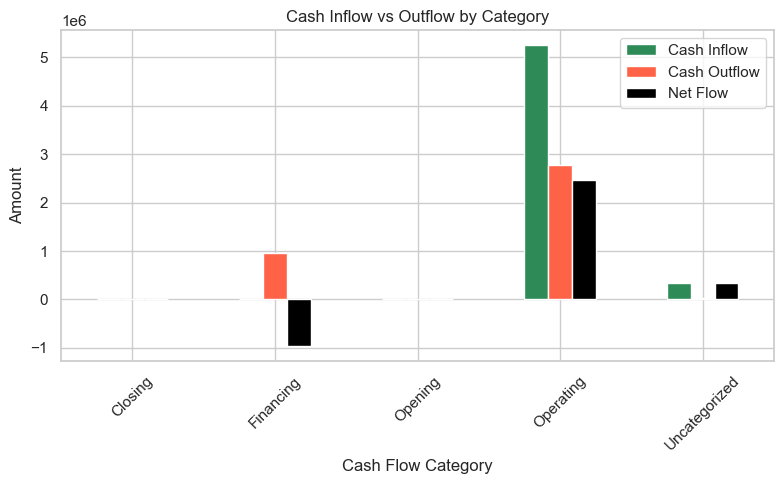

In [56]:
category_summary.plot(
    x='Cash Flow Category', 
    kind='bar', 
    stacked=False,
    figsize=(8,5),
    title='Cash Inflow vs Outflow by Category',
    color=['seagreen', 'tomato', 'black']
)
plt.xlabel("Cash Flow Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

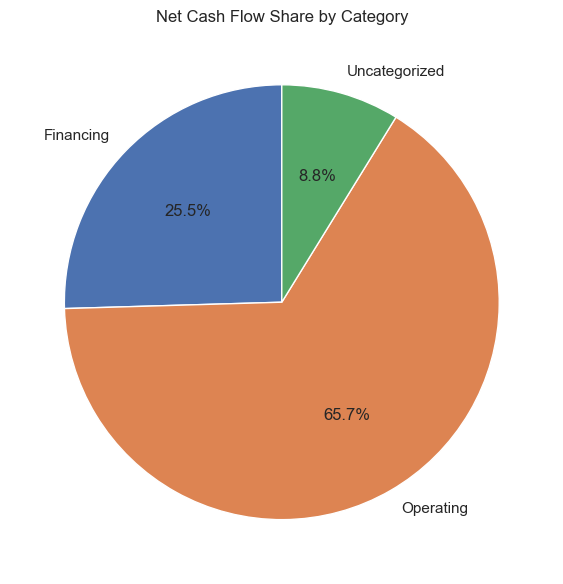

In [57]:
net_flow = transactions_data.groupby('Cash Flow Category')['Net Flow'].sum()
net_flow = net_flow[net_flow != 0]
net_flow_abs = net_flow.abs()
net_flow_abs.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6,6),
    title='Net Cash Flow Share by Category'
)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [58]:
transactions_data.to_csv('C:\\Users\\akank\\Documents\\CASHFLOW\\data/transactions_data_updated.csv', index=False)

In [59]:
transactions_data['Cash Flow Category'] = transactions_data['Cash Flow Category'].fillna('Unknown')
transactions_data['Cash Inflow'] = transactions_data['Cash Inflow'].fillna(0)
transactions_data['Cash Outflow'] = transactions_data['Cash Outflow'].fillna(0)
transactions_data['Amount'] = transactions_data['Amount'].fillna(0)
transactions_data['Balance'] = transactions_data['Balance'].fillna(method='ffill')

C:\Users\akank\AppData\Local\Temp\ipykernel_15348\2462365860.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  transactions_data['Balance'] = transactions_data['Balance'].fillna(method='ffill')


In [60]:
customer_collections = transactions_data[transactions_data['Cash_Origin'] == 'CUSTOMER_SALES']['Cash Inflow'].sum()
advance_received = transactions_data[transactions_data['Cash_Origin'].str.contains('ADVANCE', na=False)]['Cash Inflow'].sum()
operating_data = transactions_data[transactions_data['Cash Flow Category'].str.contains('Operating', case=False)]
other_receipts = operating_data['Cash Inflow'].sum() - customer_collections - advance_received
total_operating_inflows = customer_collections + advance_received + other_receipts

In [61]:
vendor_payments = transactions_data[transactions_data['Cash_Origin'].isin(['SUPPLIER_PAYMENT', 'MATERIAL_SALES'])]['Cash Outflow'].sum()
payroll_payments = transactions_data[transactions_data['Cash_Origin'] == 'PAYROLL']['Cash Outflow'].sum()
utility_payments = transactions_data[transactions_data['Description'].str.contains('Electricity|Water|Utility', case=False, na=False)]['Cash Outflow'].sum()
statutory_payments = transactions_data[transactions_data['Cash_Origin'] == 'TAX']['Cash Outflow'].sum()
known_outflows = vendor_payments + payroll_payments + utility_payments + statutory_payments
other_operating_payments = operating_data['Cash Outflow'].sum() - known_outflows
total_operating_outflows= known_outflows + other_operating_payments
net_operating_cash_flow = total_operating_inflows - total_operating_outflows

In [62]:
investing_data = transactions_data[transactions_data['Vendor_Category'].str.contains('Capex|Asset', na=False, case=False)]
asset_purchases = investing_data['Cash Outflow'].sum()
net_investing_cash_flow = -asset_purchases

In [63]:
financing_data = transactions_data[transactions_data['Cash Flow Category'].str.contains('Financing', na=False)]
debt_service_payments = financing_data['Cash Outflow'].sum()
net_financing_cash_flow = -debt_service_payments

In [64]:
opening_balance = transactions_data.iloc[0]['Balance'] - transactions_data.iloc[0]['Amount']
closing_balance = transactions_data.iloc[-1]['Balance']
net_change_in_cash = net_operating_cash_flow + net_investing_cash_flow + net_financing_cash_flow
calculated_closing_balance = opening_balance + net_change_in_cash

In [65]:
detailed_cashflow = pd.DataFrame([
    ['Operating Activities', 'Cash Receipts from Customers', customer_collections],
    ['Operating Activities', 'Cash Received as Advances', advance_received],
    ['Operating Activities', 'Other Operating Receipts', other_receipts],
    ['Operating Activities', 'Total Operating Inflows', total_operating_inflows],
    ['Operating Activities', 'Cash Paid to Suppliers (incl. Scrap)', -vendor_payments],
    ['Operating Activities', 'Cash Paid to Employees', -payroll_payments],
    ['Operating Activities', 'Cash Paid for Utilities', -utility_payments],
    ['Operating Activities', 'Cash Paid for Statutory', -statutory_payments],
    ['Operating Activities', 'Other Operating Payments', -other_operating_payments],
    ['Operating Activities', 'Total Operating Outflows', -total_operating_outflows],
    ['Operating Activities', 'Net Operating Cash Flow', net_operating_cash_flow],
    ['Investing Activities', 'Purchase of Fixed Assets', -asset_purchases],
    ['Investing Activities', 'Net Investing Cash Flow', net_investing_cash_flow],
    ['Financing Activities', 'Debt Service Payments', -debt_service_payments],
    ['Financing Activities', 'Net Financing Cash Flow', net_financing_cash_flow],
    ['Summary', 'Net Change in Cash', net_change_in_cash],
    ['Summary', 'Cash at Beginning of Period', opening_balance],
    ['Summary', 'Cash at End of Period', closing_balance],
    ['Summary', 'Calculated Ending Balance', calculated_closing_balance]
], columns=['Section', 'Description', 'Amount'])

In [66]:
import pandas as pd
import numpy as np

def prepare_detailed_cash_flow_statement_with_vendor_categories(df):
    print("📊 Preparing Cash Flow Statement with Vendor Category-wise Details...")

    # Extract vendor category from Description for vendor payments
    def extract_vendor_category(desc):
        if isinstance(desc, str) and desc.startswith('Vendor Payment -'):
            return desc.replace('Vendor Payment -', '').strip()
        else:
            return np.nan

    df['Vendor_Category_Extracted'] = df['Description'].apply(extract_vendor_category)

    # Operating activities data
    operating_data = df[df['Cash Flow Category'].str.contains('Operating', na=False)]

    # Operating inflows
    customer_collections = operating_data[operating_data['Cash Flow Category'] == 'Operating - Customer Collections']['Amount'].sum()
    advance_received = operating_data[operating_data['Cash Flow Category'] == 'Operating - Advance Received']['Amount'].sum()
    other_receipts = operating_data[operating_data['Cash Flow Category'] == 'Operating - Other Receipts']['Amount'].sum()

    # Vendor payments grouped by category
    vendor_payments = operating_data[operating_data['Vendor_Category_Extracted'].notna()]
    vendor_outflows = vendor_payments.groupby('Vendor_Category_Extracted')['Amount'].sum().reset_index()
    vendor_outflows = vendor_outflows.sort_values(by='Amount', ascending=False)

    total_vendor_payments = vendor_outflows['Amount'].sum()

    # Other operating outflows
    payroll_payments = operating_data[operating_data['Cash Flow Category'] == 'Operating - Payroll']['Amount'].sum()
    utility_payments = operating_data[operating_data['Cash Flow Category'] == 'Operating - Utilities']['Amount'].sum()
    statutory_payments = operating_data[operating_data['Cash Flow Category'] == 'Operating - Statutory']['Amount'].sum()
    other_payments = operating_data[operating_data['Cash Flow Category'] == 'Operating - Other Payments']['Amount'].sum()

    # Total operating inflows and outflows
    total_operating_inflows = customer_collections + advance_received + other_receipts
    total_operating_outflows = total_vendor_payments + payroll_payments + utility_payments + statutory_payments + other_payments
    net_operating_cash_flow = total_operating_inflows - total_operating_outflows

    # Investing activities
    investing_data = df[df['Cash Flow Category'].str.contains('Investing', na=False)]
    asset_purchases = investing_data['Amount'].sum()
    net_investing_cash_flow = -asset_purchases

    # Financing activities
    financing_data = df[df['Cash Flow Category'].str.contains('Financing', na=False)]
    debt_service = financing_data['Amount'].sum()
    net_financing_cash_flow = -debt_service

    # Opening and closing balances
    opening_balance = df.iloc[0]['Balance'] - df.iloc[0]['Amount'] if len(df) > 0 else 0
    closing_balance = df.iloc[-1]['Balance'] if len(df) > 0 else 0

    # Net change in cash
    net_change_in_cash = net_operating_cash_flow + net_investing_cash_flow + net_financing_cash_flow

    # Prepare main operating rows
    main_operating_rows = [
        ['Operating Activities', 'Cash Receipts from Customers', customer_collections],
        ['Operating Activities', 'Cash Received as Advances', advance_received],
        ['Operating Activities', 'Other Operating Receipts', other_receipts],
        ['Operating Activities', 'Total Operating Inflows', total_operating_inflows],
        ['Operating Activities', 'Cash Paid to Employees', -payroll_payments],
        ['Operating Activities', 'Cash Paid for Utilities', -utility_payments],
        ['Operating Activities', 'Cash Paid for Statutory', -statutory_payments],
        ['Operating Activities', 'Other Operating Payments', -other_payments],
        ['Operating Activities', 'Total Operating Outflows', -total_operating_outflows],
        ['Operating Activities', 'Net Operating Cash Flow', net_operating_cash_flow]
    ]

    detailed_cashflow = pd.DataFrame(main_operating_rows, columns=['Section', 'Description', 'Amount'])

    # Create vendor payment rows to insert
    vendor_payment_rows = []
    for _, row in vendor_outflows.iterrows():
        desc = f"Cash Paid to Vendor Category: {row['Vendor_Category_Extracted']}"
        vendor_payment_rows.append(['Operating Activities', desc, -row['Amount']])

    vendor_payment_df = pd.DataFrame(vendor_payment_rows, columns=['Section', 'Description', 'Amount'])

    # Insert vendor payment rows before 'Total Operating Outflows'
    total_outflows_index = detailed_cashflow[detailed_cashflow['Description'] == 'Total Operating Outflows'].index[0]

    detailed_cashflow = pd.concat([
        detailed_cashflow.iloc[:total_outflows_index],
        vendor_payment_df,
        detailed_cashflow.iloc[total_outflows_index:]
    ]).reset_index(drop=True)

    # Investing Activities summary
    investing_activities = {
        'Purchase of Fixed Assets': -asset_purchases,
        'Net Investing Cash Flow': net_investing_cash_flow
    }

    # Financing Activities summary
    financing_activities = {
        'Debt Service Payments': -debt_service,
        'Net Financing Cash Flow': net_financing_cash_flow
    }

    # Summary section
    summary = {
        'Net Change in Cash': net_change_in_cash,
        'Cash at Beginning of Period': opening_balance,
        'Cash at End of Period': closing_balance,
        'Calculated Ending Balance': opening_balance + net_change_in_cash
    }

    return {
        'Operating Activities': detailed_cashflow,
        'Investing Activities': investing_activities,
        'Financing Activities': financing_activities,
        'Summary': summary
    }


result = prepare_detailed_cash_flow_statement_with_vendor_categories(transactions_data)


📊 Preparing Cash Flow Statement with Vendor Category-wise Details...


In [67]:
result = prepare_detailed_cash_flow_statement_with_vendor_categories(transactions_data)


print(" OPERATING ACTIVITIES")
print(result['Operating Activities'].to_string(index=False))


print(" INVESTING ACTIVITIES")
investing_df = pd.DataFrame(result['Investing Activities'].items(), columns=['Description', 'Amount'])
print(investing_df.to_string(index=False))

print("FINANCING ACTIVITIES")
financing_df = pd.DataFrame(result['Financing Activities'].items(), columns=['Description', 'Amount'])
print(financing_df.to_string(index=False))

print(" CASH FLOW SUMMARY")
summary_df = pd.DataFrame(result['Summary'].items(), columns=['Metric', 'Value'])
print(summary_df.to_string(index=False))


📊 Preparing Cash Flow Statement with Vendor Category-wise Details...
 OPERATING ACTIVITIES
             Section                                     Description     Amount
Operating Activities                    Cash Receipts from Customers        0.0
Operating Activities                       Cash Received as Advances        0.0
Operating Activities                        Other Operating Receipts        0.0
Operating Activities                         Total Operating Inflows        0.0
Operating Activities                          Cash Paid to Employees       -0.0
Operating Activities                         Cash Paid for Utilities       -0.0
Operating Activities                         Cash Paid for Statutory       -0.0
Operating Activities                        Other Operating Payments       -0.0
Operating Activities     Cash Paid to Vendor Category: Raw Materials  -700000.0
Operating Activities            Cash Paid to Vendor Category: Spares  -120000.0
Operating Activities         

In [68]:

operating_str = "OPERATING ACTIVITIES\n" + result['Operating Activities'].to_string(index=False)

investing_df = pd.DataFrame(result['Investing Activities'].items(), columns=['Description', 'Amount'])
investing_str = " INVESTING ACTIVITIES\n" + investing_df.to_string(index=False)

financing_df = pd.DataFrame(result['Financing Activities'].items(), columns=['Description', 'Amount'])
financing_str = " FINANCING ACTIVITIES\n" + financing_df.to_string(index=False)

summary_df = pd.DataFrame(result['Summary'].items(), columns=['Metric', 'Value'])
summary_str = " CASH FLOW SUMMARY\n" + summary_df.to_string(index=False)


full_report = operating_str + investing_str + financing_str + summary_str

# Save to a .txt file
#with open("cash_flow_statement.txt", "w", encoding="utf-8") as file:
with open("data/cash_flow_statement.txt", "w", encoding="utf-8") as file:
    file.write(full_report)

print(" Text report saved as 'cash_flow_statement.txt'")


 Text report saved as 'cash_flow_statement.txt'


In [69]:
import numpy as np

In [70]:
ap_ar_data['Date'] = pd.to_datetime(ap_ar_data['Date'], dayfirst=True)
bank['Date'] = pd.to_datetime(bank['Date'], dayfirst=True)

In [71]:
ap_ar_data['Date'] = pd.to_datetime(ap_ar_data['Date']).dt.normalize()
bank['Date'] = pd.to_datetime(bank['Date']).dt.normalize()

In [72]:
gl_account_map = {
    'Accounts Payable': 2000,
    'Accounts Receivable': 1100,
    'Revenue': 3000,
    'Scrap Sale': 3100,
    'Maintenance Service Charges': 4200,
    'Utility Bill Payment': 4100,
    'Commission Income': 3000,
    'Export Sale - Europe': 3000,
    'Miscellaneous Income': 3000,
    'IT Services Invoice': 3000,
    'Cost of Goods Sold': 4000,
    'Cash': 1000,
    'Prepaid Expenses': 1300,
    'Accrued Expenses': 2100,
    'Salaries Expense': 4300,
}

In [73]:
ap_ar_data['GL_Account'] = ap_ar_data['Type'].map(gl_account_map)

In [74]:
ap_ar_data.head()

Date                  Description                 Type     Amount  \
0 2025-03-01        Machinery Spare Parts     Accounts Payable  151995.70   
1 2025-03-01  Maintenance Service Charges     Accounts Payable  166188.37   
2 2025-03-01         Utility Bill Payment     Accounts Payable  170056.05   
3 2025-03-01         Export Sale - Europe  Accounts Receivable  467097.61   
4 2025-03-01            Commission Income  Accounts Receivable  127014.72   

           Status  GL_Account  
0         Pending        2000  
1            Paid        2000  
2  Partially Paid        2000  
3         Pending        1100  
4        Received        1100

In [75]:
def map_gl_account_bank(desc):
    desc = str(desc).lower()
    if 'vendor' in desc:
        return 2000  # Accounts Payable
    elif 'utility' in desc:
        return 4100  # Utilities Expense
    elif 'scrap sale' in desc:
        return 3100  # Revenue - Scrap Sales
    elif 'maintenance' in desc:
        return 4200  # Maintenance Expense
    elif 'loan' in desc:
        return 2100  # Accrued Expenses or Loan
    else:
        return 1000  # Cash or default account

In [76]:
bank['GL_Account'] = bank['Description'].apply(map_gl_account_bank)

In [77]:
bank.head()

Date            Description    Type     Amount     Balance  GL_Account
0 2025-03-01      Payment to Vendor   Debit  372067.50  4627932.50        2000
1 2025-03-01          Water Utility   Debit  115489.32  4512443.18        4100
2 2025-03-01             Scrap Sale  Credit   55735.11  4568178.29        3100
3 2025-03-02  Raw Material Purchase   Debit  297293.79  4270884.50        1000
4 2025-03-02      Payment to Vendor   Debit   19749.62  4251134.88        2000

In [78]:
bank['Description'].unique()

array(['Payment to Vendor', 'Water Utility', 'Scrap Sale',
       'Raw Material Purchase', 'Bank Charges', 'Machinery Maintenance',
       'Loan EMI', 'Steel Sale - Client A', 'Insurance Premium',
       'Tax Payment', 'Salary Payment', 'Electricity Bill',
       'Freight Charges', 'Steel Sale - Client B', 'Steel Sale'],
      dtype=object)

In [79]:
transactions_data.head()

Transaction No       Date      Reference                      Description  \
0             1.0 2025-06-25           OPEN                  Opening Balance   
1             2.0 2025-06-25  CUST-INV-1001  Customer Payment - Invoice 1001   
2             3.0 2025-06-25   VEN-PAY-2001   Vendor Payment - Raw Materials   
3             4.0 2025-06-25  STAT-GST-3001                      GST Payment   
4             5.0 2025-06-25   EMP-PAY-4001             Payroll Disbursement   

      Type     Amount     Balance Cash Flow Category  Cash Inflow  \
0     OPEN        0.0  10000000.0            Opening          0.0   
1   INWARD  1500000.0  11500000.0          Operating    1500000.0   
2  OUTWARD   700000.0  10800000.0          Operating          0.0   
3  OUTWARD   250000.0  10550000.0          Financing          0.0   
4  OUTWARD   900000.0   9650000.0          Operating          0.0   

   Cash Outflow   Net Flow  GL_Account Account_Type         Account_Name  \
0           0.0        0.0         NaN         None                 None   
1           0.0  1500000.0      1100.0        Asset  Accounts Receivable   
2      700000.0  -700000.0      4000.0      Expense   Cost of Goods Sold   
3      250000.0  -250000.0      2100.0    Liability     Accrued Expenses   
4      900000.0  -900000.0      4300.0      Expense     Salaries Expense   

        Cash_Origin Vendor_Category  Calculated_Balance  \
0             OTHER   Uncategorized          10000000.0   
1    CUSTOMER_SALES           Sales          11500000.0   
2  SUPPLIER_PAYMENT   Uncategorized          10800000.0   
3               TAX             Tax          10550000.0   
4           PAYROLL         Payroll           9650000.0   

  Vendor_Category_Extracted  
0                       NaN  
1                       NaN  
2             Raw Materials  
3                       NaN  
4                       NaN

In [91]:
from fuzzywuzzy import fuzz

# Normalize and clean
ap_ar_data['Date'] = pd.to_datetime(ap_ar_data['Date']).dt.normalize()
bank['Date'] = pd.to_datetime(bank['Date']).dt.normalize()

def clean_desc(desc):
    if not isinstance(desc, str):
        return "unknown"
    desc = desc.lower()
    if "vendor" in desc or "supplier" in desc:
        return "vendor payment"
    if "scrap" in desc:
        return "scrap sale"
    if "salary" in desc or "payroll" in desc or "wage" in desc:
        return "salary"
    if "tax" in desc or "gst" in desc or "tds" in desc or "esi" in desc or "pf" in desc or "lwf" in desc:
        return "tax"
    if "electricity" in desc or "water" in desc or "utility" in desc:
        return "utility"
    if "freight" in desc or "logistics" in desc or "transport" in desc:
        return "freight"
    if "loan" in desc or "emi" in desc:
        return "loan"
    if "client" in desc or "invoice" in desc or "sale" in desc or "commission" in desc or "receipt" in desc:
        return "client receipt"
    if "insurance" in desc:
        return "insurance"
    if "maintenance" in desc or "repair" in desc or "service" in desc or "cleaning" in desc or "calibration" in desc:
        return "maintenance"
    if "bank charge" in desc or "bank fee" in desc:
        return "bank charge"
    if "canteen" in desc or "training" in desc or "consultancy" in desc or "security" in desc:
        return "services"
    if "advance" in desc:
        return "advance"
    return "other"

# Apply
bank['Clean_Description'] = bank['Description'].apply(clean_desc)
ap_ar_data['Clean_Description'] = ap_ar_data['Description'].apply(clean_desc)

# Round
bank['Amount'] = bank['Amount'].round(2)
ap_ar_data['Amount'] = ap_ar_data['Amount'].round(2)

# Remove duplicate categories
bank = bank.drop_duplicates(subset=['Clean_Description', 'Amount'])
ap_ar_data = ap_ar_data.drop_duplicates(subset=['Clean_Description', 'Amount'])

from fuzzywuzzy import fuzz

matches_ap_ar = []
used_bank_indices = set()

# Exact + fuzzy matching on Clean_Description and Amount within tolerance
for _, ap_row in ap_ar_data.iterrows():
    ap_desc = ap_row['Clean_Description']
    ap_amt = ap_row['Amount']
    
    for idx, bank_row in bank.iterrows():
        if idx in used_bank_indices:
            continue
        
        bank_desc = bank_row['Clean_Description']
        bank_amt = bank_row['Amount']
        amt_diff = abs(ap_amt - bank_amt)
        
        # Exact match on cleaned description + amount tolerance
        if ap_desc == bank_desc and amt_diff <= 10000:
            matches_ap_ar.append({
                'AP_AR_Description': ap_row['Description'],
                'AP_AR_Amount': ap_amt,
                'Bank_Description': bank_row['Description'],
                'Bank_Amount': bank_amt,
                'Category': ap_desc,
                'Amount_Difference': amt_diff,
                'Confidence': 100
            })
            used_bank_indices.add(idx)
            break
        
        # Fuzzy match on cleaned description + amount tolerance
        else:
            fuzzy_score = fuzz.partial_ratio(ap_desc, bank_desc)
            if fuzzy_score >= 85 and amt_diff <= 10000:
                matches_ap_ar.append({
                    'AP_AR_Description': ap_row['Description'],
                    'AP_AR_Amount': ap_amt,
                    'Bank_Description': bank_row['Description'],
                    'Bank_Amount': bank_amt,
                    'Category': ap_desc,
                    'Amount_Difference': amt_diff,
                    'Confidence': fuzzy_score
                })
                used_bank_indices.add(idx)
                break

# Convert to DataFrame for matched rows
matches_ap_ar_df = pd.DataFrame(matches_ap_ar)

# Drop duplicates if any
matches_ap_ar_df = matches_ap_ar_df.drop_duplicates(subset=['AP_AR_Description', 'Bank_Description'])

# Sort matches by amount difference and confidence
matches_ap_ar_df = matches_ap_ar_df.sort_values(by=["Confidence", "Amount_Difference"], ascending=[False, True])

# Identify unmatched rows in AP/AR and Bank datasets for second fuzzy matching

# 1. Unmatched AP/AR rows
matched_ap_ar_descriptions = set(matches_ap_ar_df['AP_AR_Description'])
unmatched_ap_ar = ap_ar_data[~ap_ar_data['Description'].isin(matched_ap_ar_descriptions)].copy()

# 2. Unmatched Bank rows
matched_bank_descriptions = set(matches_ap_ar_df['Bank_Description'])
unmatched_bank = bank[~bank['Description'].isin(matched_bank_descriptions)].copy()

# Second fuzzy matching on unmatched rows
fuzzy_matches = []

for idx_ar, ar_row in unmatched_ap_ar.iterrows():
    best_score = 0
    best_bank_idx = None
    for idx_bk, bk_row in unmatched_bank.iterrows():
        score = fuzz.token_sort_ratio(str(ar_row['Description']), str(bk_row['Description']))
        amt_diff = abs(ar_row['Amount'] - bk_row['Amount'])
        if score > 80 and amt_diff <= 10000:  # Thresholds
            if score > best_score:
                best_score = score
                best_bank_idx = idx_bk
    if best_bank_idx is not None:
        fuzzy_matches.append({
            "AP_AR_Description": ar_row['Description'],
            "AP_AR_Amount": ar_row['Amount'],
            "Bank_Description": unmatched_bank.loc[best_bank_idx]['Description'],
            "Bank_Amount": unmatched_bank.loc[best_bank_idx]['Amount'],
            "Fuzzy_Score": best_score,
            "Amount_Difference": abs(ar_row['Amount'] - unmatched_bank.loc[best_bank_idx]['Amount'])
        })

fuzzy_matches_df = pd.DataFrame(fuzzy_matches)

if not fuzzy_matches_df.empty:
    fuzzy_matched_ap_ar_desc = set(fuzzy_matches_df['AP_AR_Description'])
    fuzzy_matched_bank_desc = set(fuzzy_matches_df['Bank_Description'])
else:
    fuzzy_matched_ap_ar_desc = set()
    fuzzy_matched_bank_desc = set()

final_unmatched_ap_ar = unmatched_ap_ar[~unmatched_ap_ar['Description'].isin(fuzzy_matched_ap_ar_desc)]
final_unmatched_bank = unmatched_bank[~unmatched_bank['Description'].isin(fuzzy_matched_bank_desc)]

# Flag unmatched bank transactions as "Missing in AP/AR"
final_unmatched_bank['Reconciliation_Status'] = 'Missing in AP/AR'
final_unmatched_bank['Investigation_Notes'] = ''

# Flag unmatched AP/AR transactions as "Pending from Bank"
final_unmatched_ap_ar['Reconciliation_Status'] = 'Pending from Bank'
final_unmatched_ap_ar['Investigation_Notes'] = ''

# Save flagged unmatched transactions for review
final_unmatched_bank.to_excel("data/unmatched_bank_missing_in_ap_ar.xlsx", index=False)
final_unmatched_ap_ar.to_excel("data/unmatched_ap_ar_pending_in_bank.xlsx", index=False)

# Print summary info
print(f"⚠️ Unmatched Bank Transactions flagged as 'Missing in AP/AR': {len(final_unmatched_bank)}")
print(final_unmatched_bank[['Date', 'Description', 'Amount', 'Reconciliation_Status']].head(10))

print(f"⚠️ Unmatched AP/AR Transactions flagged as 'Pending from Bank': {len(final_unmatched_ap_ar)}")
print(final_unmatched_ap_ar[['Date', 'Description', 'Amount', 'Reconciliation_Status']].head(10))

# Export results
matches_ap_ar_df.to_excel("data/matched_exact_transactions.xlsx", index=False)
fuzzy_matches_df.to_excel("data/matched_fuzzy_transactions.xlsx", index=False)


print(f"Exact Matches Found: {len(matches_ap_ar_df)}")
print(f"Fuzzy Matches Found: {len(fuzzy_matches_df)}")
print(f"Unmatched AP/AR Transactions (Pending from Bank): {len(final_unmatched_ap_ar)}")
print(f"Unmatched Bank Transactions (Missing in AP/AR): {len(final_unmatched_bank)}")


⚠️ Unmatched Bank Transactions flagged as 'Missing in AP/AR': 162
         Date        Description     Amount Reconciliation_Status
6  2025-03-02       Bank Charges   18135.30      Missing in AP/AR
13 2025-03-03           Loan EMI   81962.35      Missing in AP/AR
16 2025-03-04  Insurance Premium  175258.08      Missing in AP/AR
17 2025-03-04           Loan EMI  404528.50      Missing in AP/AR
18 2025-03-05        Tax Payment   66788.95      Missing in AP/AR
20 2025-03-05           Loan EMI  415555.31      Missing in AP/AR
21 2025-03-05       Bank Charges  443298.62      Missing in AP/AR
22 2025-03-05     Salary Payment  290789.31      Missing in AP/AR
26 2025-03-06  Insurance Premium   54995.71      Missing in AP/AR
27 2025-03-06           Loan EMI  229438.10      Missing in AP/AR
⚠️ Unmatched AP/AR Transactions flagged as 'Pending from Bank': 0
Empty DataFrame
Columns: [Date, Description, Amount, Reconciliation_Status]
Index: []
Exact Matches Found: 20
Fuzzy Matches Found: 0
Unmatched

In [81]:
print(f"Unique AP/AR Descriptions: {ap_ar_data['Clean_Description'].nunique()}")
print(f"Unique Bank Descriptions: {bank['Clean_Description'].nunique()}")


Unique AP/AR Descriptions: 5
Unique Bank Descriptions: 8


In [82]:
print(f"AP/AR Rows before deduplication: {ap_ar_data.shape[0]}")
ap_ar_data = ap_ar_data.drop_duplicates(subset=["Description", "Amount"])
print(f"AP/AR Rows after deduplication: {ap_ar_data.shape[0]}")

print(f"Bank Rows before deduplication: {bank.shape[0]}")
bank = bank.drop_duplicates(subset=["Description", "Amount"])
print(f"Bank Rows after deduplication: {bank.shape[0]}")


AP/AR Rows before deduplication: 343
AP/AR Rows after deduplication: 343
Bank Rows before deduplication: 433
Bank Rows after deduplication: 433


In [83]:
print(matches_ap_ar_df['Category'].value_counts())


Category
client receipt    12
maintenance        9
utility            2
vendor payment     2
freight            1
Name: count, dtype: int64


In [87]:
print(matches_ap_ar_df['Amount_Difference'].describe())


count     3515.000000
mean     24211.827713
std      14418.851407
min         15.340000
25%      11763.425000
50%      23806.770000
75%      36160.625000
max      49979.730000
Name: Amount_Difference, dtype: float64
